In [9]:
import sys
import copy
import torch
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
sys.path.append("/home/zanardi/Codes/ML/RONEK/ronek/")
from ronek.systems import TAFASystem
from ronek import const

In [11]:
T = 1e4
rho = 1e-3

In [12]:
path_to_dtb = "/home/zanardi/Codes/ML/RONEK/ronek/examples/VC_O3_O4/database/"
system = TAFASystem(
  species={
    k: path_to_dtb + f"/species/{k}.json" for k in ("atom", "molecule")
  },
  rates_coeff=path_to_dtb + "/kinetics.hdf5",
  use_einsum=False,
  use_factorial=True,
  use_arrhenius=False
)

In [ ]:
system.update_fom_ops(T)
n_eq = system.mix.compute_eq_comp(rho)
A = system._compute_lin_fom_ops_a_full(n_eq[0], by_mass=False)

In [ ]:
j = system.jac(0.0, n_eq/const.UNA, system.fom_ops)

In [36]:
n0 = system.mix._get_init_sol(T=3e2, w_a=1e-3, rho=rho)

In [39]:
t = system.get_tgrid(1e-12, 1e-2, 200)
na, nm, runtime = system.solve_fom(t, n0)

(45, 200)

In [41]:
nlin = [sp.linalg.expm(A*ti) @ (n0-n_eq) + n_eq for ti in t]
nlin = np.vstack(nlin).T
nm_lin = nlin[1:]

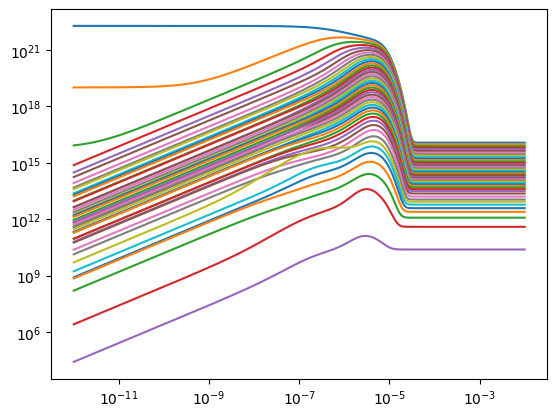

In [ ]:
for i in range(n0.shape[0]-1):
  plt.loglog(t[1:], nm[i][1:])
  plt.loglog(t[1:], nm_lin[i][1:], ls="--", color=plt.gca().lines[-1].get_color())
plt.show()
plt.close()

In [ ]:
for s in model.mix.species.values():
print(s.name)
err = []
for i in s.indices:
  ierr = np.mean(np.abs((n_true[i] - n_pred[i])/n_true[i]))
  err.append(ierr)
  plt.loglog(t[1:], n_true[i][1:])
  plt.loglog(t[1:], n_pred[i][1:], ls="--", color=plt.gca().lines[-1].get_color())
plt.show()
plt.close()